# Thief Detector
## A motion detection algorithm that alarms you when you have an unwanted visitor in your home.

## Steps
- 1. Get the live video feed from your webcam
- 2. Fix a scene (the place you want to monitor) and store it as a reference background image
    - Store the first frame as the reference background frame
- 3. For every frame, check if there is any unwanted object inside the scene you are monitoring
    - Use **Background Subtraction** concept (**cv2.absdiff( )**)
        - Subtract the current frame from the reference background image(frame) to see the changes in the scene
- 4. Output the text **"UNSAFE"** in **red** color on the top right of the frame when there is an intruder in the scene.

## Get live video feed from webcam

In [45]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Initialize the webcam
cap = cv2.VideoCapture(0)  # 0 represents the default webcam

# Read the first frame
ret, frame = cap.read()

cv2.imshow('Original Webcam', frame)
cv2.waitKey(0)

13

## Read first frame, convert to Grayscale and store it as reference background image

In [46]:
# Check if the frame is captured successfully
if not ret:
    print("Error: Could not read frame")
    exit()

# Convert the frame to grayscale
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Store the grayscale frame as the reference background image
reference_background = gray_frame

# Display the original frame
cv2.imshow('Reference background', reference_background)
cv2.waitKey(0)


-1

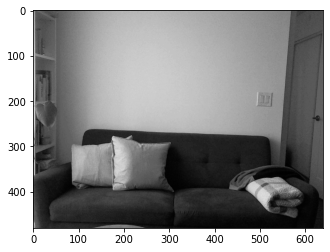

In [47]:
plt.imshow(reference_background, cmap='gray')
plt.show()

## Compute Absolute Difference between Current and First frame 

In [48]:
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
 
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Compute the absolute difference between the current and first frame
    abs_diff = cv2.absdiff(gray, reference_background)

    # Display the absolute difference frame
    cv2.imshow('Absolute Difference Frame', abs_diff)    
    
    # Wait for a short period, and check for manual stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

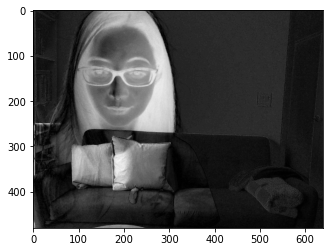

In [49]:
plt.imshow(abs_diff, cmap='gray')
plt.show()

## Apply threshold 

In [51]:
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current and reference background frame
    abs_diff = cv2.absdiff(gray, reference_background)

    # Apply thresholding
    _, thresholded_diff = cv2.threshold(abs_diff, 30, 255, cv2.THRESH_BINARY)

    # Display the thresholded frame
    cv2.imshow('Thresholded Difference Frame', thresholded_diff)

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


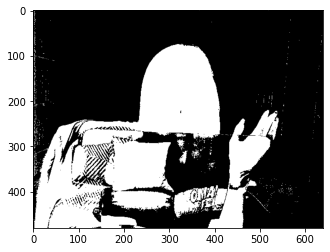

In [52]:
plt.imshow(thresholded_diff, cmap='gray')
plt.show()

## Find contours

In [53]:
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current and reference background frame
    abs_diff = cv2.absdiff(gray, reference_background)

    # Apply thresholding
    _, thresholded_diff = cv2.threshold(abs_diff, 30, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresholded_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original frame
    frame_with_contours = cv2.drawContours(frame, contours, -1, (0, 255, 0), 2)

    # Display the frame with contours
    cv2.imshow('Frame with Contours', frame_with_contours)

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


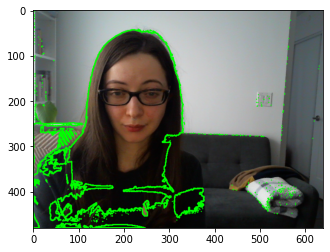

In [54]:
frame_with_contours2 = frame_with_contours[:, :, ::-1]
plt.imshow(frame_with_contours2)
plt.show()

## Check if contourArea is large and draw rectangle around the object, output "UNSAFE" text in red color 

In [55]:
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current and reference background frame
    abs_diff = cv2.absdiff(gray, reference_background)

    # Apply thresholding
    _, thresholded_diff = cv2.threshold(abs_diff, 30, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresholded_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over the contours
    for contour in contours:
        # Compute the area of the contour
        area = cv2.contourArea(contour)

        # Check if contour area is large
        if area > 1000:  # You can adjust this threshold value as needed
            # Draw rectangle around the object
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Output "UNSAFE" text in red color
            cv2.putText(frame, "UNSAFE", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow('Frame', frame)

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


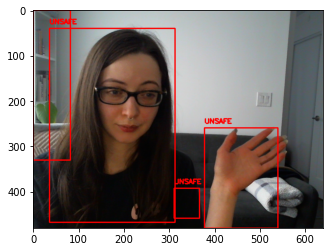

In [56]:
frame2 = frame[:, :, ::-1]
plt.imshow(frame2)
plt.show()

## Display images 

In [57]:
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current and reference background frame
    abs_diff = cv2.absdiff(gray, reference_background)

    # Apply thresholding
    _, thresholded_diff = cv2.threshold(abs_diff, 30, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresholded_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over the contours
    for contour in contours:
        # Compute the area of the contour
        area = cv2.contourArea(contour)

        # Check if contour area is large
        if area > 1000:  # You can adjust this threshold value as needed
            # Draw rectangle around the object
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Output "UNSAFE" text in red color
            cv2.putText(frame, "UNSAFE", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow('Frame', frame)

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


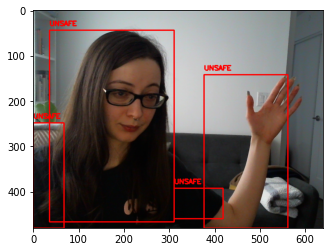

In [58]:
frame2 = frame[:, :, ::-1]
plt.imshow(frame2)
plt.show()

## Release objects 

In [59]:
cap = cv2.VideoCapture('testvideo1.mp4')
 
while(cap.isOpened()):
    ret, frame = cap.read()
 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('Thief',frame)
    if cv2.waitKey(1) &0XFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
